In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
realNum = 5
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
x = np.arange(len(theoretical))
x = x * 2*np.pi / 1000
spec = [None]*101
for i in range(101):
	spec[i] = np.zeros(len(theoretical))
	for b in range(realNum):
		realisation = np.fromfile('Data/' + str(b) + 'spec' + str(i * 100) + '.data', dtype=np.double)
		for s in range(len(realisation)):
			spec[i][s] += realisation[s]
	spec[i] = spec[i] / realNum

In [154]:
dofa = np.fromfile('dVals.data', dtype=np.double)

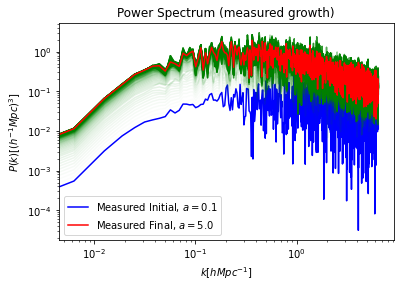

In [155]:
initial = spec[0]
final = spec[-1]
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum (measured growth)')
plt.xlabel('$k [h Mpc^{-1}]$')
plt.ylabel('$P(k) [(h^{-1} Mpc)^{3}]$')
plt.loglog(x, initial, label='Measured Initial, $a = 0.1$', c='blue')
for i in range(1, len(spec)-1):
	spec[i][0] = 0.0
	plt.loglog(x, spec[i], c='green', alpha=i*0.01)
plt.loglog(x, final, label='Measured Final, $a = 5.0$', c='red')
plt.legend()
plt.savefig('measured.png')
plt.show()

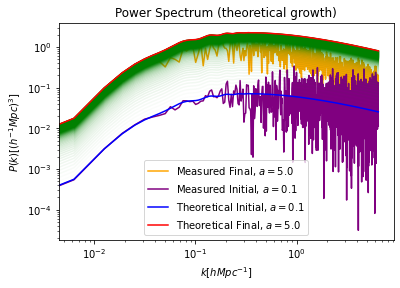

In [156]:
plt.figure()
plt.title('Power Spectrum (theoretical growth)')
plt.xlabel('$k [h Mpc^{-1}]$')
plt.ylabel('$P(k) [(h^{-1} Mpc)^{3}]$')
plt.loglog(x, final, label='Measured Final, $a = 5.0$', c='orange')
plt.loglog(x, initial, label='Measured Initial, $a = 0.1$', c='purple')
for i in range(1, len(spec)-1):
	spec[i][0] = 0.0
	plt.loglog(x, theoretical*((dofa[i]**2) / (dofa[0]**2)), c='green', alpha=i*0.01)
spec[-1][0] = 0.0
plt.loglog(x, theoretical, label='Theoretical Initial, $a = 0.1$', c='blue')
plt.loglog(x, theoretical*((dofa[-1]**2) / (dofa[0]**2)), label='Theoretical Final, $a = 5.0$', c='red', alpha=(len(spec)-1)*0.01)
plt.legend()
plt.savefig('theoretical.png')
plt.show()

In [157]:
xPositions = np.arange(100)*10
dens = [None]*101
for i in range(101):
	dens[i] = np.zeros(100)
	realisation = np.fromfile('Data/0pos' + str(i * 100) + '.data', dtype=np.double)
	for s in range(len(realisation)):
		if realisation[s] >= 1000:
			realisation[s] = 999
		dens[i][int(np.floor(realisation[s]/10))] += 1 / 2048

In [158]:
aVals = np.fromfile('aVals.data', dtype=np.double)

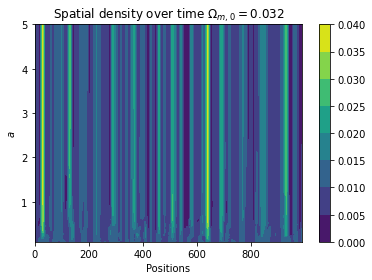

In [159]:
X, Y = np.meshgrid(xPositions, aVals)
plt.figure()
plt.title('Spatial density over time $\Omega_{m, 0} = 0.032$')
plt.xlabel('Positions')
plt.ylabel('$a$')
plt.contourf(X, Y, dens)
plt.colorbar()
plt.savefig('densityTime.png')
plt.show()